Name: Gaoxian Song

# MTH9879 Homework 1

Assigned: January 31, 2017.
Due: February 14, 2017 by 6pm. 

Late homework **will not be accepted**.

$$
\newcommand{\supp}{\mathrm{supp}}
\newcommand{\E}{\mathbb{E} }
\def\Cov{{ \mbox{Cov} }}
\def\Var{{ \mbox{Var} }}
\newcommand{\1}{\mathbf{1} }
\newcommand{\PP}{\mathbb{P} }
%\newcommand{\Pr}{\mathrm{Pr} }
\newcommand{\QQ}{\mathbb{Q} }
\newcommand{\RR}{\mathbb{R} }
\newcommand{\DD}{\mathbb{D} }
\newcommand{\HH}{\mathbb{H} }
\newcommand{\spn}{\mathrm{span} }
\newcommand{\cov}{\mathrm{cov} }
\newcommand{\sgn}{\mathrm{sgn} }
\newcommand{\HS}{\mathcal{L}_{\mathrm{HS}} }
%\newcommand{\HS}{\mathrm{HS} }
\newcommand{\trace}{\mathrm{trace} }
\newcommand{\LL}{\mathcal{L} }
%\newcommand{\LL}{\mathrm{L} }
\newcommand{\s}{\mathcal{S} }
\newcommand{\ee}{\mathcal{E} }
\newcommand{\ff}{\mathcal{F} }
\newcommand{\hh}{\mathcal{H} }
\newcommand{\bb}{\mathcal{B} }
\newcommand{\dd}{\mathcal{D} }
\newcommand{\g}{\mathcal{G} }
\newcommand{\p}{\partial}
\newcommand{\half}{\frac{1}{2} }
\newcommand{\T}{\mathcal{T} }
\newcommand{\bi}{\begin{itemize}}
\newcommand{\ei}{\end{itemize}}
\newcommand{\beq}{\begin{equation}}
\newcommand{\eeq}{\end{equation}}
\newcommand{\beas}{\begin{eqnarray*}}
\newcommand{\eeas}{\end{eqnarray*}}
\newcommand{\cO}{\mathcal{O}}
\newcommand{\cF}{\mathcal{F}}
\newcommand{\cL}{\mathcal{L}}
\newcommand{\BS}{\text{BS}}
$$

<font color = "red">Homework is to be done by each student individually.  To receive full credit, you must email a completed copy of this iPython notebook to Victor Istratov (stavka@gmail.com), Yassine Ghalem (yassine.ghalem@gmail.com) and Jim Gatheral (jim.gatheral@gmail.com) by the due date and time.  All R-code must run correctly and solutions must be written up neatly in Markdown/LaTeX format.

### 1. (4 points) 

Read Chapter 1 of Market Liquidity by Foucault, Pagano and R&ouml;ell.
What algorithmic trading strategy was being used by the seller who triggered the Flash
Crash of May 6, 2010? Why did it cause a crash? How could this algorithm have been
amended so as to avoid the ensuing disaster?

i) The seller who triggered the Flash Crash used the “constant participation rate” strategy of splitting the order to sell 75,000 E-mini futures.

ii) This strategy splitted the order in such a way that each "child" order executes a fixed fraction of total trading volume over the given time period. However, the order, by itself, was relatively very large and the sub-orders increased the total trading volume significantly. Thus, each "child" order also became larger and using this strategy accelerated the execution of the whole order draining the market liquidity and distorting the price in a short time. 

iii) One option is to add an upper limit of the trading volume of the strategy in a given period to the original strategy. For example, for one child order, the trading volume equals to min(upper limit, fixed fraction of total trading volume). With a reasonable upper limit, the execution of the whole order can be slowed down leaving less impact on market liquidity and price.

## The Smith Farmer zero-intelligence model

### Set up R-environment

The following code sources *ziSetup.R* which contains all the functions required for the problem.

In [1]:
#R version is 3.3.2
download.file(url="http://mfe.baruch.cuny.edu/wp-content/uploads/2015/01/ziSetup.zip", destfile="ziSetup.zip")
unzip(zipfile="ziSetup.zip")

source("ziSetup.R")

### 2. (4 points)

Using the provided functions in *ziSetup.R* (with $\alpha = 1$, $\mu = 10$, $\delta = 1/5$),
initialize the order book and add two orders to the (best) bid side of the book. The resulting
book should have 3 orders at best bid and 1 order at best offer. Plot the resulting book
shape.

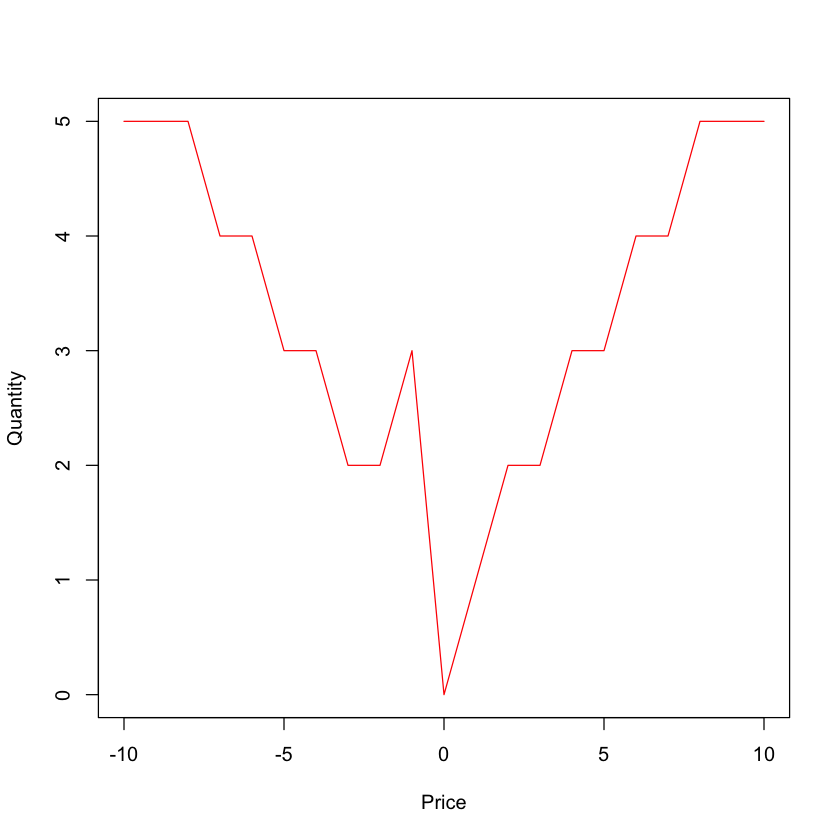

In [7]:
numEvents<- 2 #set number of events for log
alpha<- 1 
mu<- 10
delta<-0.2
initializeBook5() #initialize book
limitBuyOrder(bestBid())
limitBuyOrder(bestBid()) #add two best bid orders
band<- 10 #specify band to plot
bookPlot(band) #plot order book shape

### 3. (16 points)

(a) Using the code supplied to generate Figure 2 as a template, simulate 100,000 events, computing the average book shape (in a band $\pm 20$ around the mid price) for the
following sets of parameters:

|$\alpha$|$\mu$|$\delta$|
-----|-----:|-------:|
I| 1 | 10 | $\frac15$
II| 1 | 8 |  $\frac15$
III| 1 |  10 | $\frac16$
IV| 1  | 10 | $\frac18$ 

(Warning: This might take longer than 15 minutes to run!).

(b) Generate a summary plot of the average book shapes for each parameter set (I, II, II, and IV).


(c) Verify that the relationships between the slopes of the order books at-the-money for each parameter set are consistent with the predictions from dimensional analysis.

(d) Verify that the asymptotic book depths are consistent with the predictions from dimensional analysis.

In [ ]:
logging<- F
caseno<- 1
while(caseno<=4){
  alpha<- 1
  mu<- 10
  if(caseno==2){mu<- 8}
  delta<- 0.2
  if(caseno==3){delta<- 1.0/6.0}
  if(caseno==4){delta<- 0.125}
  numEvents<- 100000
  initializeBook5()
  band<- 20
  aveBookShape<- bookShape(band)/numEvents
  for(count in 1:numEvents){
    generateEvent()
    aveBookShape<- aveBookShape+bookShape(band)/numEvents
  }
  plot(-band:band,aveBookShape,main="Figure for case "+caseno, xlab="Relative Price",ylab="Shares",col="red",type="b")
  caseno<- caseno+1
}

### The following code sets up the data required for Problem 4.

In [8]:
download.file(url="http://mfe.baruch.cuny.edu/wp-content/uploads/2015/01/ziSimResults.rData_.zip", destfile="ziSimResults.rData.zip")
unzip(zipfile="ziSimResults.rData.zip")
load("ziSimResults.rData")

### 4. (12 points)

The datafile *ziSimResults.rData* contains a list of bid and ask prices after 100 events resulting from 10,000 simulations of the SFGK model with $\alpha = 1$, $\mu = 10$, and $\delta = 1/5$. The $j$th element of the list has results for an initial book configuration with $q_b = j$ shares on the bid side and $q_a = 1$ share on the ask side.

(a) For each size $q_b$ at best bid, compute the mean mid-price after 10,000 events and with error computed as standard deviation of the mean.

(b) Plot mean mid-price vs size at best bid, reproducing Figure 3 of the lecture slides. 
Remember to include error bars!

(c) Repeat part (b) with the order book imbalance $I$ on the x-axis, reproducing Figure 7 in the lecture slides.


(d) If you see an order book with large quantity at the bid and small quantity at the offer, what does it tell you about the future price?

## Is the market price a martingale?

### 5. (4 points) 

A derivatives quant explains (patiently) to you that asset prices are martingales (informally speaking that expected price changes are zero). Do you agree? How is your understanding consistent with the derivative quant’s understanding?